# Heart Failure Prediction

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingCVClassifier
from sklearn.impute import SimpleImputer 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
import plotly.express as px
import plotly.graph_objects as go

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
data = pd.read_csv('framingham.csv')
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
data.shape

(4238, 16)

In [4]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
data['cigsPerDay'].fillna(data['cigsPerDay'].median(),inplace=True)
data['BPMeds'].fillna(0,inplace=True)
data['totChol'].fillna(data['totChol'].mean(),inplace=True)
data['BMI'].fillna(data['BMI'].mean(),inplace=True)
data['heartRate'].fillna(data['heartRate'].mean(),inplace=True)
data['education'].fillna(data['education'].median(),inplace=True)
data['glucose'].fillna(data['glucose'].mean(),inplace=True)

In [6]:
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

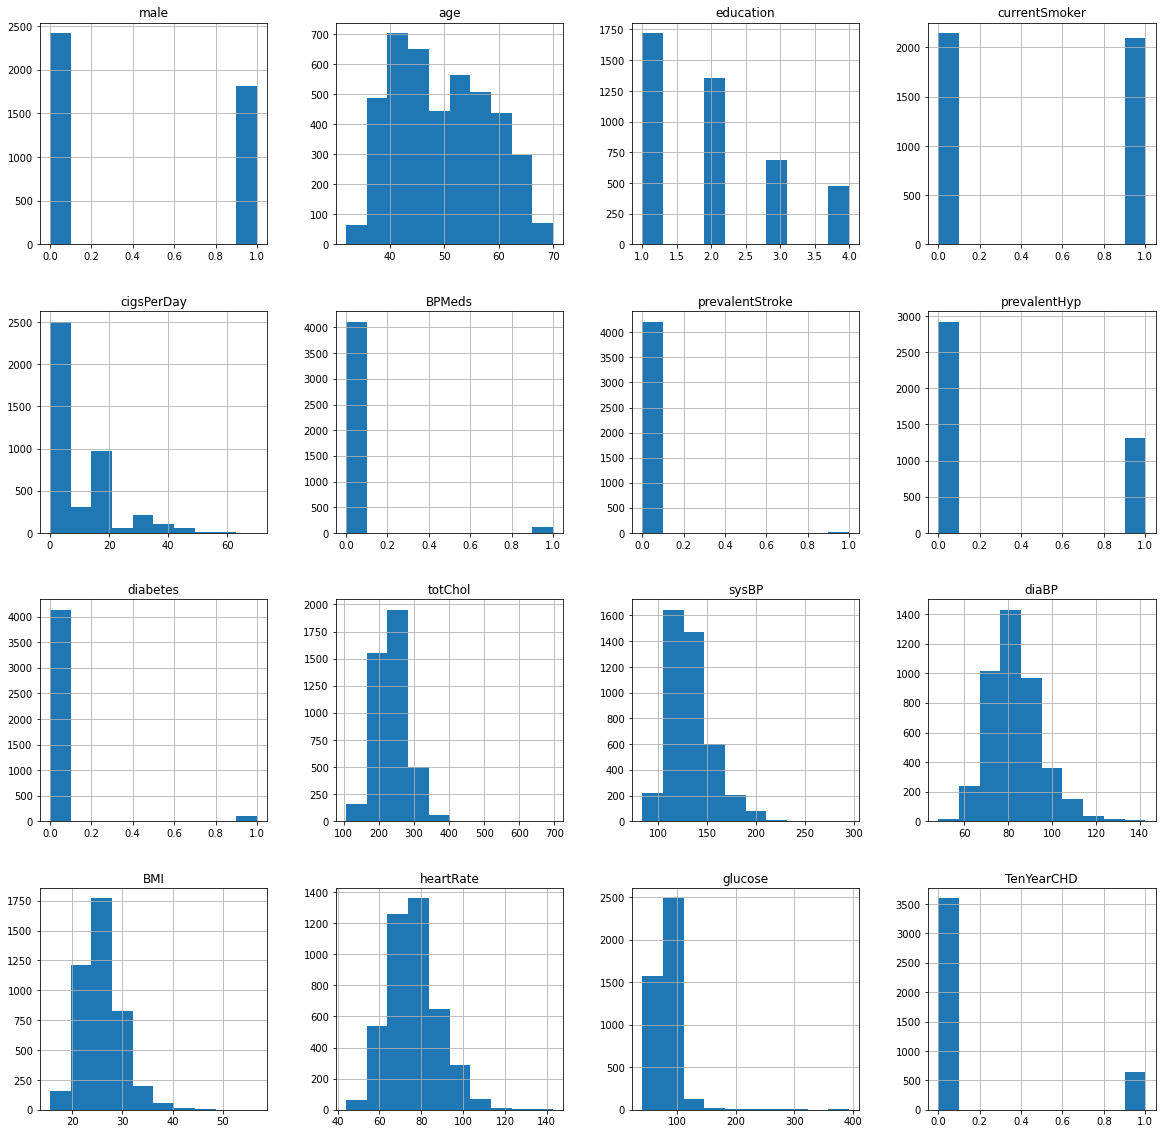

In [7]:
data.hist(figsize=(20,20));

In [8]:
corr = data.corr().sort_values(by='TenYearCHD',ascending=False).round(2)
print(corr['TenYearCHD'])

TenYearCHD         1.00
age                0.23
sysBP              0.22
prevalentHyp       0.18
diaBP              0.15
glucose            0.12
diabetes           0.10
male               0.09
BPMeds             0.09
totChol            0.08
BMI                0.07
prevalentStroke    0.06
cigsPerDay         0.06
heartRate          0.02
currentSmoker      0.02
education         -0.05
Name: TenYearCHD, dtype: float64


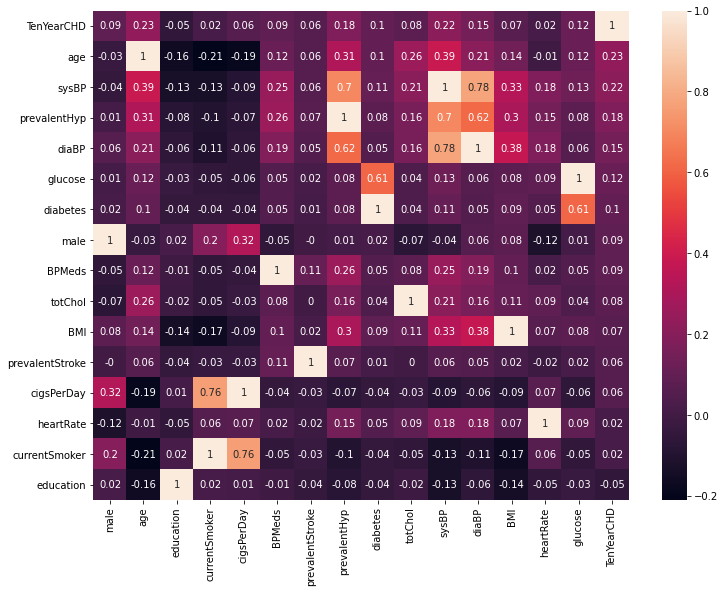

In [9]:
import seaborn as sns
plt.subplots(figsize=(12, 9))
sns.heatmap(corr,annot=True)

In [10]:
data.TenYearCHD.value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

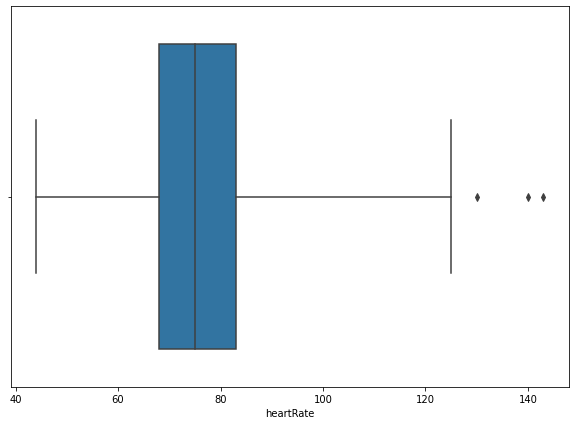

In [11]:
plt.figure(figsize=(10,7))
sns.boxplot(data=data, x='heartRate',whis=3)
plt.show()

In [12]:
#Removing the outliers
data[data['heartRate']>125]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
339,0,64,1.0,0,0.0,0.0,0,1,0,312.0,160.0,82.0,27.59,140.0,94.0,0
358,0,40,3.0,1,20.0,0.0,0,0,0,210.0,118.0,79.0,21.21,130.0,84.0,0
3142,0,57,1.0,0,0.0,0.0,0,0,0,257.0,133.0,94.0,17.71,143.0,75.0,0


In [13]:
data.drop([339,358,3142],inplace=True)

In [14]:
#Splitting categorical and numerical data
data_num = data[['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]
data_cat = data[['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes','TenYearCHD']]

age = 0.22844012961365537


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



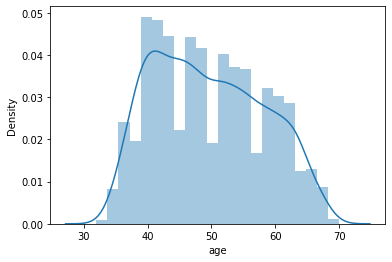

cigsPerDay = 1.2570735031653029


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



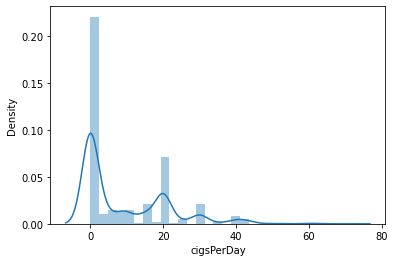

totChol = 0.8770297870329483


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



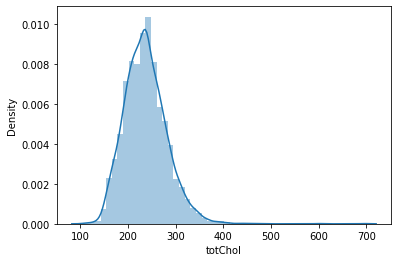

sysBP = 1.1454089998653474


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



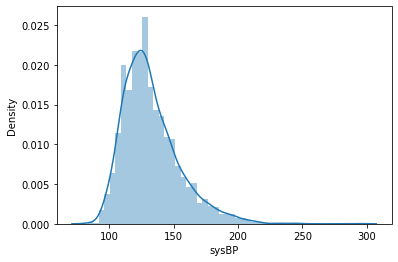

diaBP = 0.714037641416359


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



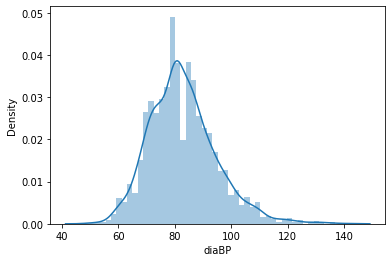

BMI = 0.9856534546412419


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



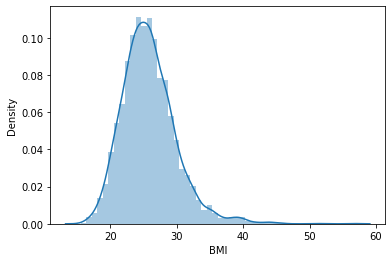

heartRate = 0.572614333821323


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



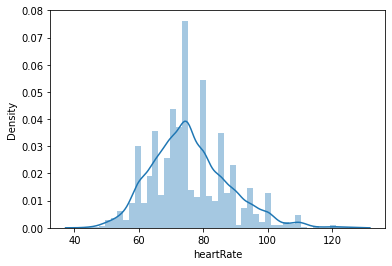

glucose = 6.515197172708798


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



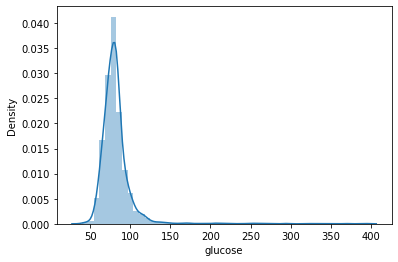

In [15]:
from scipy.stats import skew
for col in data_num:
    try:
        print(col,"=",skew(data_num[col]))
        sns.distplot(data_num[col])
        plt.show()
    except:
        pass


In [16]:
data_num['cigsPerDay'] = np.sqrt(data_num['cigsPerDay'])
data_num['totChol'] = np.sqrt(data_num['totChol'])
data_num['sysBP'] = np.log(data_num['sysBP'])
data_num['diaBP'] = np.sqrt(data_num['diaBP'])
data_num['BMI'] = np.sqrt(data_num['BMI'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [17]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
data_num.drop('glucose',axis=1,inplace=True)

In [19]:
data_new = pd.concat([data_num,data_cat],axis=1)

In [20]:
#Dataset before performing scaling 
data_new.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,male,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
0,39,0.000000,13.964240,4.663439,8.366600,5.193265,80.0,1,4.0,0,0.0,0,0,0,0
1,46,0.000000,15.811388,4.795791,9.000000,5.360037,95.0,0,2.0,0,0.0,0,0,0,0
2,48,4.472136,15.652476,4.848116,8.944272,5.033885,75.0,1,1.0,1,0.0,0,0,0,0
3,61,5.477226,15.000000,5.010635,9.746794,5.346027,65.0,0,3.0,1,0.0,0,1,0,1
4,46,4.795832,16.881943,4.867534,9.165151,4.806246,85.0,0,3.0,1,0.0,0,0,0,0


In [21]:
from sklearn.preprocessing import MinMaxScaler
for col in data_new:
    mm = MinMaxScaler()
    data_new[col] = mm.fit_transform(data_new[[col]])
data_new.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,male,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
0,0.184211,0.000000,0.225728,0.189040,0.287155,0.348083,0.444444,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.368421,0.000000,0.340903,0.293903,0.413604,0.394480,0.629630,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0
2,0.421053,0.534522,0.330994,0.335362,0.402479,0.303743,0.382716,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0
3,0.763158,0.654654,0.290310,0.464128,0.562690,0.390582,0.259259,0.0,0.666667,1.0,0.0,0.0,1.0,0.0,1.0
4,0.368421,0.573212,0.407655,0.350747,0.446574,0.240413,0.506173,0.0,0.666667,1.0,0.0,0.0,0.0,0.0,0.0


In [22]:
#Dividing the dataset into train and test data
from sklearn.model_selection import train_test_split

x = data_new.drop('TenYearCHD',axis=1)
y = data_new['TenYearCHD']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [23]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression()
logr.fit(x_train,y_train)

y_hat = logr.predict(x_test)

In [24]:
#Importing few metrics to check model performace
from sklearn.metrics import confusion_matrix
from sklearn.metrics import (accuracy_score, recall_score, precision_score, f1_score)
cm = confusion_matrix(y_test,y_hat)

In [25]:
#Confusion matrix 
print(cm)

[[1072    4]
 [ 188    7]]


In [26]:
print("Accuracy Score: ",accuracy_score(y_test, y_hat))
print("Recall Score: ",recall_score(y_test, y_hat))
print("Precision Score: ",precision_score(y_test, y_hat))
print("F1 Score: ",f1_score(y_test, y_hat))

Accuracy Score:  0.8489378442171518
Recall Score:  0.035897435897435895
Precision Score:  0.6363636363636364
F1 Score:  0.06796116504854369


In [27]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_hat))

0.5160899818892385


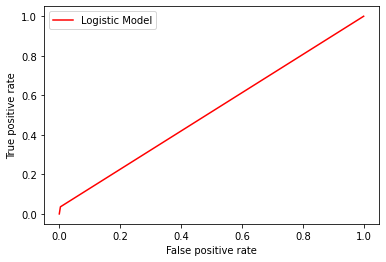

In [28]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y_test,y_hat)
plt.plot(fpr,tpr,'r-',label="Logistic Model")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend()
plt.show()

In [29]:
# Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.7749803304484658

In [31]:
model_cat = CatBoostClassifier(n_estimators=100  ,  depth = 8, random_state=42)
model_cat.fit(x_train , y_train)

print(model_cat.score(x_test , y_test))
print('Training Accuracy: {:.3f}'.format(accuracy_score(y_train, model_cat.predict(x_train))))
print('Testing Accuracy: {:.3f}'.format(accuracy_score(y_test, model_cat.predict(x_test))))

Learning rate set to 0.13534
0:	learn: 0.6326342	total: 60.1ms	remaining: 5.95s
1:	learn: 0.5838734	total: 65ms	remaining: 3.19s
2:	learn: 0.5469462	total: 69.3ms	remaining: 2.24s
3:	learn: 0.5159220	total: 73.6ms	remaining: 1.77s
4:	learn: 0.4908283	total: 78ms	remaining: 1.48s
5:	learn: 0.4707092	total: 82.4ms	remaining: 1.29s
6:	learn: 0.4550646	total: 86.9ms	remaining: 1.15s
7:	learn: 0.4408717	total: 91.4ms	remaining: 1.05s
8:	learn: 0.4285738	total: 95.7ms	remaining: 968ms
9:	learn: 0.4194111	total: 100ms	remaining: 901ms
10:	learn: 0.4123457	total: 105ms	remaining: 846ms
11:	learn: 0.4059597	total: 109ms	remaining: 800ms
12:	learn: 0.4002913	total: 113ms	remaining: 759ms
13:	learn: 0.3944485	total: 118ms	remaining: 724ms
14:	learn: 0.3897907	total: 122ms	remaining: 694ms
15:	learn: 0.3851219	total: 127ms	remaining: 666ms
16:	learn: 0.3812545	total: 142ms	remaining: 692ms
17:	learn: 0.3778762	total: 146ms	remaining: 666ms
18:	learn: 0.3747438	total: 150ms	remaining: 641ms
19:	lea

In [32]:
y_pred = model_cat.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
recall = cm[0][0]/(cm[0][0] + cm[1][0])
print(recall)

[[1057   19]
 [ 185   10]]
0.8510466988727858


In [33]:
rnd_clf = RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_leaf=2 , min_samples_split=2, random_state=42)
rnd_clf.fit(x_train, y_train)

# print(rnd_clf.score(X_test , y_test))
print('Training Accuracy: {:.3f}'.format(accuracy_score(y_train, rnd_clf.predict(x_train))))
print('Testing Accuracy: {:.3f}'.format(accuracy_score(y_test, rnd_clf.predict(x_test))))

Training Accuracy: 0.865
Testing Accuracy: 0.843


In [34]:
y_pred = rnd_clf.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
recall = cm[0][0]/(cm[0][0] + cm[1][0])
print(recall)

[[1068    8]
 [ 192    3]]
0.8476190476190476


In [35]:
xgb = XGBClassifier( n_estimators=50, max_depth=2, colsample_bylevel=0.7, colsample_bynode=0.7, random_state= 69)

xgb_model = xgb.fit(x_train, y_train)

print('Training Accuracy: {:.3f}'.format(accuracy_score(y_train, xgb_model.predict(x_train))))
print('Testing Accuracy: {:.3f}'.format(accuracy_score(y_test, xgb_model.predict(x_test))))

Training Accuracy: 0.855
Testing Accuracy: 0.845


In [36]:
y_pred = xgb_model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
recall = cm[0][0]/(cm[0][0] + cm[1][0])
print(recall)

[[1070    6]
 [ 191    4]]
0.8485329103885805


In [37]:
y_pred = xgb_model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
recall = cm[0][0]/(cm[0][0] + cm[1][0])
print(recall)

[[1070    6]
 [ 191    4]]
0.8485329103885805


In [38]:
svc =  SVC(kernel='rbf', C=2, gamma='auto')
svc.fit(x_train, y_train)

print('Training Accuracy: {:.3f}'.format(accuracy_score(y_train, svc.predict(x_train))))
print('Testing Accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(x_test))))

Training Accuracy: 0.849
Testing Accuracy: 0.847


In [39]:
y_pred = svc.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
recall = cm[0][0]/(cm[0][0] + cm[1][0])
print(recall)

[[1076    0]
 [ 195    0]]
0.8465774980330448


In [40]:
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.6)
ada.fit(x_train, y_train)

print('Training Accuracy: {:.3f}'.format(accuracy_score(y_train, ada.predict(x_train))))
print('Testing Accuracy: {:.3f}'.format(accuracy_score(y_test, ada.predict(x_test))))

Training Accuracy: 0.862
Testing Accuracy: 0.834


In [41]:
y_pred = ada.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
recall = cm[0][0]/(cm[0][0] + cm[1][0])
print(recall)

[[1051   25]
 [ 186    9]]
0.8496362166531932


In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)

print('Training Accuracy: {:.3f}'.format(accuracy_score(y_train, knn.predict(x_train))))
print('Testing Accuracy: {:.3f}'.format(accuracy_score(y_test, knn.predict(x_test))))

Training Accuracy: 0.854
Testing Accuracy: 0.845


In [43]:
y_pred = knn.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
recall = cm[0][0]/(cm[0][0] + cm[1][0])
print(recall)

[[1073    3]
 [ 194    1]]
0.8468823993685872
